## Census Transforms

This notebook is written to summarize census transforms (1994).

- paper: [Non-parametric Local Transforms for Computing Visual Correspondenc](https://link.springer.com/content/pdf/10.1007%2FBFb0028345.pdf)
- code: [census-transform-pytorch](https://github.com/mlaves/census-transform-pytorch)

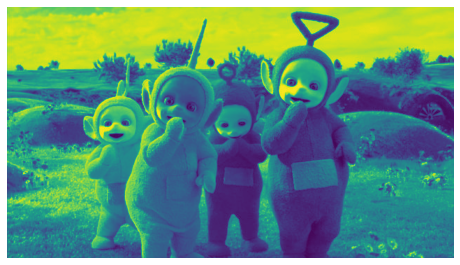

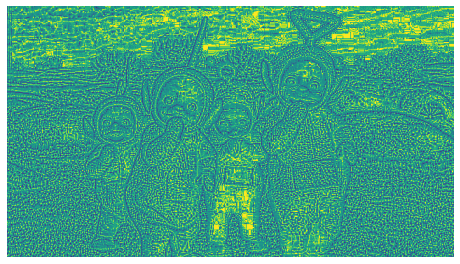

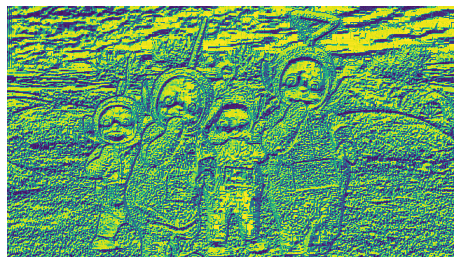

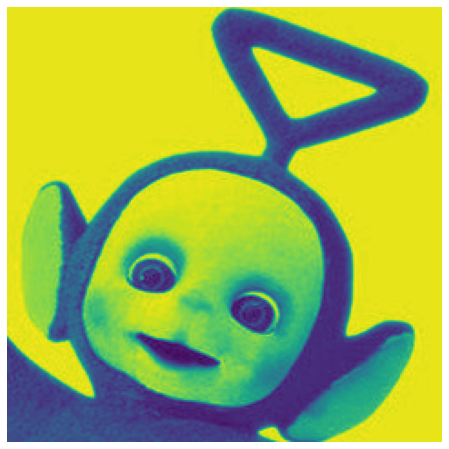

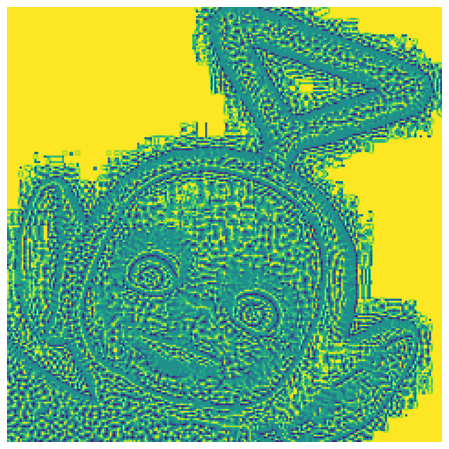

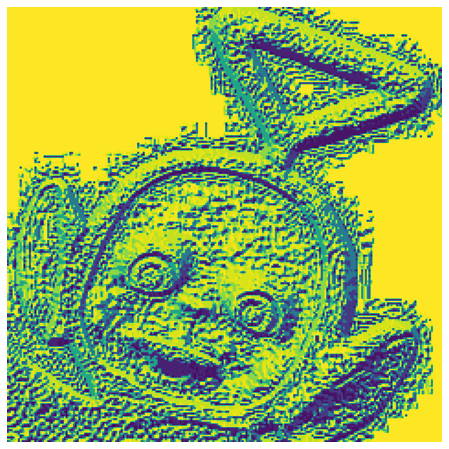

(358, 638) (237, 237)


In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


def show_img(img):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


def load_img(path):
    return np.asarray(Image.open(path).convert('L'))


def census_transform(img):
    H, W = img.shape

    transformed = np.zeros((H-2, W-2), dtype='uint8')
    cp = img[1:H-1, 1:W-1]
    offsets = [(u, v) for v in range(3) for u in range(3) if not u == 1 == v]

    for u, v in offsets:
        transformed = (transformed << 1) | (img[v:v+H-2, u:u+W-2] >= cp)

    return transformed


def rank_transform(img):
    H, W = img.shape

    transformed = np.zeros((H-2, W-2), dtype='uint8')
    cp = img[1:H-1, 1:W-1]
    offsets = [(u, v) for v in range(3) for u in range(3) if not u == 1 == v]

    for u, v in offsets:
        transformed += img[v:v+H-2, u:u+W-2] >= cp

    return transformed


def get_transformed_img(path, mode='census'):
    img = load_img(path)
    img_rank = rank_transform(img)
    img_census = census_transform(img)
    show_img(img)
    show_img(img_rank)
    show_img(img_census)

    if mode == 'rank':
        return img_rank
    elif mode == 'census':
        return img_census

img1 = get_transformed_img('sample_imgs/whole.jpg')
img2 = get_transformed_img('sample_imgs/bora.jpg')

print(img1.shape, img2.shape)